In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Use Pandas Plotting with Matplotlib to plot the data



In [7]:
Base.prepare(engine, reflect=True)

NameError: name 'Base' is not defined

In [8]:
Base.classes.keys()


NameError: name 'Base' is not defined

In [9]:
# We can view all of the classes that automap found
conn= engine.connect()


In [10]:
# reflect an existing database into a new model

Base = automap_base()


# reflect the tables

In [21]:
# Save references to each table
hawaii_pd = pd.read_sql("SELECT * FROM measurement", conn)

In [22]:
# Create our session (link) from Python to the DB
# Perform a query to retrieve the data and preciitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column


hawaii_pd


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


Text(0, 0.5, 'Preciptation')

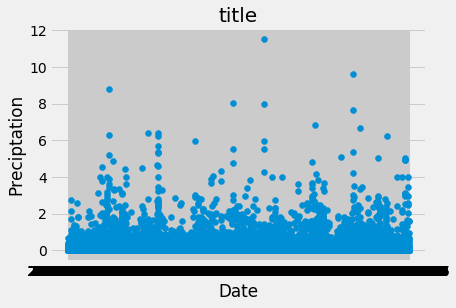

In [39]:
plt.scatter(hawaii_pd["date"], hawaii_pd["prcp"], marker="o")
plt.title("title")
plt.xlabel("Date")
plt.ylabel("Preciptation")

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

hawaii_pd= hawaii_pd.set_index(['date'])
hawaii_pd

,id,station,prcp,tobs
date,,,,
2010-01-01,1,USC00519397,0.08,65.0
2010-01-02,2,USC00519397,0.00,63.0
2010-01-03,3,USC00519397,0.00,74.0
2010-01-04,4,USC00519397,0.00,76.0
2010-01-06,5,USC00519397,NaN,73.0
...,...,...,...,...
2017-08-19,19546,USC00516128,0.09,71.0
2017-08-20,19547,USC00516128,NaN,78.0
2017-08-21,19548,USC00516128,0.56,76.0


In [15]:
# Sort the dataframe by date
hawaii_pd= hawaii_pd.sort_values(by='date', ascending=True)
hawaii_pd


,id,station,prcp,tobs
date,,,,
2010-01-01,1,USC00519397,0.08,65.0
2010-01-01,9008,USC00518838,0.21,72.0
2010-01-01,9519,USC00519523,0.15,75.0
2010-01-01,12188,USC00519281,0.15,70.0
2010-01-01,14960,USC00511918,0.05,66.0
...,...,...,...,...
2017-08-22,19549,USC00516128,0.50,76.0
2017-08-23,2724,USC00519397,0.00,81.0
2017-08-23,7635,USC00514830,0.00,82.0


# Exploratory Climate Analysis

In [24]:
# Calculate the date 1 year ago from the last data point in the database
max

column = hawaii_pd["date"]
max_value = column.max()
one_year =hawaii_pd.loc[hawaii_pd["date"].between('2016-08-23', 'max_value')]
one_year


,id,station,date,prcp,tobs
2363,2364,USC00519397,2016-08-23,0.00,81.0
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [26]:
hawaii_pd.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prec17 =hawaii_pd.loc[hawaii_pd["date"].between('2017-01-01', '2018-01-01')]
prec17


,id,station,date,prcp,tobs
2494,2495,USC00519397,2017-01-01,0.00,62.0
2495,2496,USC00519397,2017-01-02,0.00,66.0
2496,2497,USC00519397,2017-01-03,0.00,63.0
2497,2498,USC00519397,2017-01-04,0.00,62.0
2498,2499,USC00519397,2017-01-05,0.00,63.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
hawaii_pd['prcp'].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [29]:
# Design a query to show how many stations are available in this dataset?
hawaii_pd['station'].nunique()

9

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations= hawaii_pd.groupby(['station']).count()
stations= stations.sort_values(by='id', ascending=False)
print (stations['id'])

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: id, dtype: int64


In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
topstation= hawaii_pd.loc[hawaii_pd['station'] == 'USC00519281']
topstation.describe()
# highest temperature recorded, and average temperature of the most active station?


,id,prcp,tobs
count,2772.000000,2772.000000,2772.000000
mean,13573.500000,0.212352,71.663781
std,800.351798,0.543312,4.357642
min,12188.000000,0.000000,54.000000
25%,12880.750000,0.000000,69.000000
50%,13573.500000,0.040000,72.000000
75%,14266.250000,0.190000,74.000000
max,14959.000000,9.640000,85.000000


In [32]:
print('For station USC00519281 Max Temp= 85, Min Temp= 54, Average Temp= 71.7')


For station USC00519281 Max Temp= 85, Min Temp= 54, Average Temp= 71.7


In [33]:
topstation

,id,station,date,prcp,tobs
12187,12188,USC00519281,2010-01-01,0.15,70.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
12189,12190,USC00519281,2010-01-03,0.00,74.0
12190,12191,USC00519281,2010-01-04,0.00,75.0
12191,12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...,...
14954,14955,USC00519281,2017-08-14,0.00,77.0
14955,14956,USC00519281,2017-08-15,0.32,77.0
14956,14957,USC00519281,2017-08-16,0.12,76.0
14957,14958,USC00519281,2017-08-17,0.01,76.0


In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
topstation= topstation.loc[topstation["date"].between('2017-01-01', '2018-01-01')]
topstation

,id,station,date,prcp,tobs
14738,14739,USC00519281,2017-01-01,0.03,72.0
14739,14740,USC00519281,2017-01-02,0.01,70.0
14740,14741,USC00519281,2017-01-03,0.00,64.0
14741,14742,USC00519281,2017-01-04,0.00,63.0
14742,14743,USC00519281,2017-01-05,0.06,63.0
...,...,...,...,...,...
14954,14955,USC00519281,2017-08-14,0.00,77.0
14955,14956,USC00519281,2017-08-15,0.32,77.0
14956,14957,USC00519281,2017-08-16,0.12,76.0
14957,14958,USC00519281,2017-08-17,0.01,76.0


In [35]:
topstation.drop(['station', 'id', 'prcp'], axis=1)

,date,tobs
14738,2017-01-01,72.0
14739,2017-01-02,70.0
14740,2017-01-03,64.0
14741,2017-01-04,63.0
14742,2017-01-05,63.0
...,...,...
14954,2017-08-14,77.0
14955,2017-08-15,77.0
14956,2017-08-16,76.0
14957,2017-08-17,76.0


Text(0, 0.5, 'Precipitation')

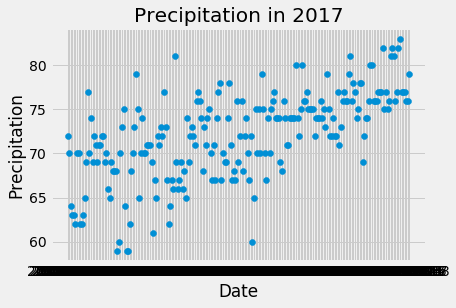

In [38]:
plt.scatter(topstation["date"], topstation["tobs"], marker="o")
plt.title("Precipitation in 2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")

## Bonus Challenge Assignment